In [198]:
import pandas as pd # 基本ライブラリ
import numpy as np # 基本ライブラリ
import matplotlib.pyplot as plt # グラフ描画用
from matplotlib import pyplot as plt
# matplotlibに日本語を表示させる為に必要
plt.rcParams['font.family'] = 'IPAexGothic'
%matplotlib inline
import japanize_matplotlib
import seaborn as sns; sns.set() # グラフ描画用
import warnings # 実行に関係ない警告を無視
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error # モデル評価用(平均二乗誤差)
from sklearn.metrics import r2_score # モデル評価用(決定係数)
import lightgbm as lgb

In [199]:
dfpit = pd.read_pickle('dfpit.pickle')

In [200]:
pd.set_option('display.max_rows', 200)

### Light GBM（チーム含まず）

#### モデル作成

In [201]:
dfpit['japan'].replace(True,1,inplace = True)
dfpit['japan'].replace(False,0,inplace = True)

In [202]:
test = dfpit[dfpit['year']==2021].drop(['player','team','birthplace'],axis = 1)
train = dfpit[dfpit['year']!=2021].drop(['player','team','birthplace'],axis = 1)

x_test = test.drop('salary',axis = 1)
y_test = test['salary']

x_train = train.drop('salary',axis = 1)
y_train = train['salary']

train_set = lgb.Dataset(x_train, y_train)
test_set = lgb.Dataset(x_test, y_test)

In [203]:
params = {
    "objective" : "regression",
    "metric" : "rmse"
}

model = lgb.train(
    params = params,
    train_set = train_set,
    valid_sets = [train_set, test_set],
    num_boost_round = 100
)

y_pred = model.predict(x_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2688
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 40
[LightGBM] [Info] Start training from score 10559.653313
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's rmse: 9652.97	valid_1's rmse: 11303.9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's rmse: 9093.22	valid_1's rmse: 10971.5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's rmse: 8610.77	valid_1's rmse: 10642.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's rmse: 8182.48	valid_1's rmse: 10405.9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	training's rmse: 7801.84	valid_1's rmse: 10252
[LightGBM] [War

In [204]:
df_pred

,player,team,age,salary,salary_pred,diff,diff_ratio
0,平良 海馬,西武,22.0,4200.0,3236.360440,963.639560,1.297754
1,スアレス,阪神,30.0,26000.0,14600.006136,11399.993864,1.780821
2,山本 由伸,オリックス,23.0,15000.0,14228.912053,771.087947,1.054192
3,マルティネス,ソフトバンク,31.0,10000.0,10590.311224,-590.311224,0.944259
4,髙橋 遥人,阪神,26.0,2900.0,3203.357697,-303.357697,0.905300
5,Ｒ．マルティネス,中日,25.0,6000.0,6248.778103,-248.778103,0.960188
6,柳 裕也,中日,27.0,4100.0,8794.335871,-4694.335871,0.466209
7,益田 直也,ロッテ,32.0,20000.0,24657.162357,-4657.162357,0.811123
8,酒居 知史,楽天,28.0,4000.0,4614.329120,-614.329120,0.866865
9,清水 昇,ヤクルト,25.0,3600.0,2908.878604,691.121396,1.237590


#### モデルの評価

In [205]:
# rmse : 平均二乗誤差の平方根
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
print('RMSE :',rmse)

# r2 : 決定係数
r2 = r2_score(y_test,y_pred)
print('R2 :',r2)

RMSE : 8251.72606303825
R2 : 0.49946958961867927


In [206]:
result_data = {}
model = lgb.train(
    params = params,
    train_set = train_set,
    valid_sets = [train_set, test_set],
    num_boost_round = 100,
    evals_result = result_data)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2688
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 40
[LightGBM] [Info] Start training from score 10559.653313
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's rmse: 9652.97	valid_1's rmse: 11303.9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's rmse: 9093.22	valid_1's rmse: 10971.5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's rmse: 8610.77	valid_1's rmse: 10642.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's rmse: 8182.48	valid_1's rmse: 10405.9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5

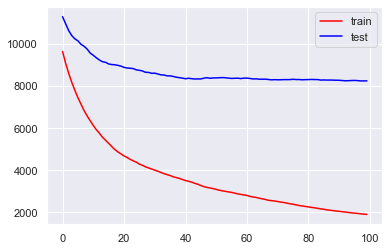

In [207]:
plt.plot(result_data["training"]["rmse"], color = "red", label = "train")
plt.plot(result_data["valid_1"]["rmse"], color = "blue", label = "test")
plt.legend()
plt.show()

In [208]:
feat_cols = x_train.columns.tolist()

##### 重要度の計算

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

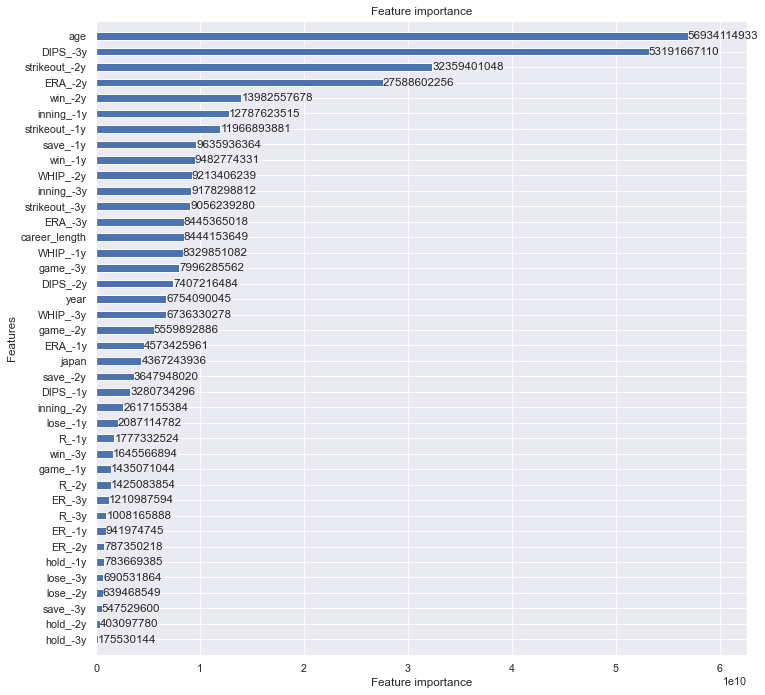

In [209]:
lgb.plot_importance(model, height = 0.5, figsize=(12,12),dpi = 70, importance_type='gain',precision = 0)

### プレイヤーの評価

In [210]:
df_pred = pd.DataFrame({'player':dfpit[dfpit['year']==2021]['player'],
                        'team':dfpit[dfpit['year']==2021]['team'],
                        'age': dfpit[dfpit['year']==2021]['age'],
                        'salary':y_test,'salary_pred':y_pred})
df_pred['diff'] = df_pred['salary'] - df_pred['salary_pred']
df_pred['diff_ratio'] = df_pred['salary'] / df_pred['salary_pred']
df_pred.sort_values('diff',ascending = False)

,player,team,age,salary,salary_pred,diff,diff_ratio
28,菅野 智之,巨人,32.0,80000.0,24244.545989,55755.454011,3.299711
13,千賀 滉大,ソフトバンク,28.0,40000.0,15528.708942,24471.291058,2.575874
66,サンチェス,巨人,32.0,34000.0,13011.944965,20988.055035,2.612984
27,則本 昂大,楽天,31.0,30000.0,15873.485080,14126.514920,1.889944
1,スアレス,阪神,30.0,26000.0,14600.006136,11399.993864,1.780821
71,ニール,西武,33.0,21500.0,14761.482150,6738.517850,1.456493
26,今永 昇太,DeNA,28.0,10000.0,5215.112954,4784.887046,1.917504
37,岸 孝之,楽天,37.0,25000.0,20390.211423,4609.788577,1.226079
57,小川 泰弘,ヤクルト,31.0,16000.0,11479.500688,4520.499312,1.393789
18,大野 雄大,中日,33.0,30000.0,26180.168406,3819.831594,1.145906


In [224]:
df_pred.groupby('team').mean()['diff'].sort_values(ascending = False)

team
巨人        12362.555038
楽天         4024.134241
ソフトバンク     3587.101776
西武         1379.509242
阪神         1017.014108
広島          590.975696
ロッテ         333.796496
DeNA        278.579305
オリックス        11.818269
日本ハム       -154.700809
ヤクルト       -678.579669
中日         -709.331941
Name: diff, dtype: float64

In [212]:
df_pred.sort_values('diff_ratio',ascending = False)

,player,team,age,salary,salary_pred,diff,diff_ratio
28,菅野 智之,巨人,32.0,80000.0,24244.545989,55755.454011,3.299711
66,サンチェス,巨人,32.0,34000.0,13011.944965,20988.055035,2.612984
13,千賀 滉大,ソフトバンク,28.0,40000.0,15528.708942,24471.291058,2.575874
54,濵口 遥大,DeNA,26.0,5500.0,2618.218686,2881.781314,2.100665
69,藤浪 晋太郎,阪神,27.0,6000.0,2953.925983,3046.074017,2.031195
26,今永 昇太,DeNA,28.0,10000.0,5215.112954,4784.887046,1.917504
27,則本 昂大,楽天,31.0,30000.0,15873.485080,14126.514920,1.889944
24,畠 世周,巨人,27.0,2200.0,1215.995163,984.004837,1.809218
1,スアレス,阪神,30.0,26000.0,14600.006136,11399.993864,1.780821
55,田口 麗斗,ヤクルト,26.0,7000.0,4494.277846,2505.722154,1.557536


### Light GBM（チーム含む）

#### モデル作成

In [213]:
dfpit['japan'].replace(True,1,inplace = True)
dfpit['japan'].replace(False,0,inplace = True)

In [214]:
test1 = dfpit[dfpit['year']==2021].drop(['player','birthplace'],axis = 1)
train1 = dfpit[dfpit['year']!=2021].drop(['player','birthplace'],axis = 1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test1['team1'] = le.fit_transform(test1['team'])
train1['team1'] = le.fit_transform(train1['team'])

test1 = test1.drop(['team'],axis = 1)
train1 = train1.drop(['team'],axis = 1)

x_test1 = test1.drop('salary',axis = 1)
y_test1 = test1['salary']

x_train1 = train1.drop('salary',axis = 1)
y_train1 = train1['salary']

train_set1 = lgb.Dataset(x_train1, y_train1)
test_set1 = lgb.Dataset(x_test1, y_test1)

In [215]:
params1 = {
    "objective" : "regression",
    "metric" : "rmse"
}

model1 = lgb.train(
    params = params,
    train_set = train_set1,
    valid_sets = [train_set1, test_set1],
    num_boost_round = 100
)

y_pred1 = model1.predict(x_test1)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2700
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 41
[LightGBM] [Info] Start training from score 10559.653313
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's rmse: 9652.58	valid_1's rmse: 11304.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's rmse: 9092.74	valid_1's rmse: 10969.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's rmse: 8610.22	valid_1's rmse: 10638.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's rmse: 8180.97	valid_1's rmse: 10399.3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5

#### モデルの評価

In [216]:
# rmse : 平均二乗誤差の平方根
mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = np.sqrt(mse1) 
print('RMSE :',rmse1)

# r2 : 決定係数
r21 = r2_score(y_test1,y_pred1)
print('R2 :',r21)

RMSE : 8352.703113309324
R2 : 0.4871445735325902


In [217]:
result_data1 = {}
model1 = lgb.train(
    params = params1,
    train_set = train_set1,
    valid_sets = [train_set1, test_set1],
    num_boost_round = 100,
    evals_result = result_data1)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2700
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 41
[LightGBM] [Info] Start training from score 10559.653313
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's rmse: 9652.58	valid_1's rmse: 11304.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's rmse: 9092.74	valid_1's rmse: 10969.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's rmse: 8610.22	valid_1's rmse: 10638.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's rmse: 8180.97	valid_1's rmse: 10399.3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	training's rmse: 7800.31	valid_1's rmse: 10245
[LightGBM] [War

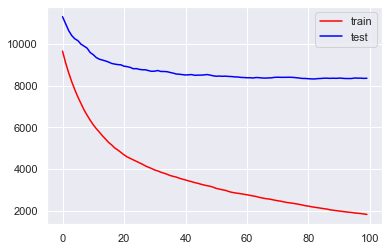

In [218]:
plt.plot(result_data1["training"]["rmse"], color = "red", label = "train")
plt.plot(result_data1["valid_1"]["rmse"], color = "blue", label = "test")
plt.legend()
plt.show()

In [219]:
feat_cols1 = x_train1.columns.tolist()

##### 重要度の計算

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

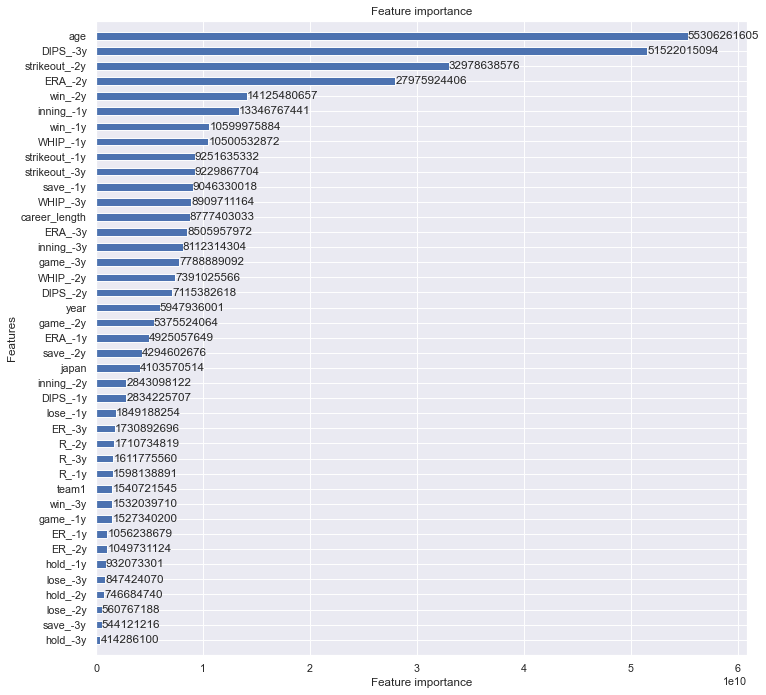

In [220]:
lgb.plot_importance(model1, height = 0.5, figsize=(12,12),dpi = 70, importance_type='gain',precision = 0)

### プレイヤーの評価

In [221]:
df_pred1 = pd.DataFrame({'player':dfpit[dfpit['year']==2021]['player'],
                        'team':dfpit[dfpit['year']==2021]['team'],
                        'salary':y_test1,'salary_pred':y_pred1})
df_pred1['diff'] = df_pred1['salary'] - df_pred1['salary_pred']
df_pred1['diff_ratio'] = df_pred1['salary'] / df_pred1['salary_pred']
df_pred1.sort_values('diff',ascending = False)

,player,team,salary,salary_pred,diff,diff_ratio
28,菅野 智之,巨人,80000.0,23653.657137,56346.342863,3.382141
13,千賀 滉大,ソフトバンク,40000.0,15994.158384,24005.841616,2.500913
66,サンチェス,巨人,34000.0,12673.530862,21326.469138,2.682757
27,則本 昂大,楽天,30000.0,15835.231141,14164.768859,1.894510
1,スアレス,阪神,26000.0,13085.137715,12914.862285,1.986987
71,ニール,西武,21500.0,15266.615106,6233.384894,1.408302
37,岸 孝之,楽天,25000.0,20111.528575,4888.471425,1.243068
23,大瀬良 大地,広島,15000.0,10749.212494,4250.787506,1.395451
57,小川 泰弘,ヤクルト,16000.0,12061.990125,3938.009875,1.326481
18,大野 雄大,中日,30000.0,26140.321773,3859.678227,1.147652


In [222]:
df_pred1.sort_values('diff_ratio',ascending = False)

,player,team,salary,salary_pred,diff,diff_ratio
31,瀧中 瞭太,楽天,1300.0,116.464678,1183.535322,11.162183
28,菅野 智之,巨人,80000.0,23653.657137,56346.342863,3.382141
66,サンチェス,巨人,34000.0,12673.530862,21326.469138,2.682757
13,千賀 滉大,ソフトバンク,40000.0,15994.158384,24005.841616,2.500913
69,藤浪 晋太郎,阪神,6000.0,2872.219746,3127.780254,2.088977
54,濵口 遥大,DeNA,5500.0,2649.772071,2850.227929,2.075650
1,スアレス,阪神,26000.0,13085.137715,12914.862285,1.986987
27,則本 昂大,楽天,30000.0,15835.231141,14164.768859,1.894510
55,田口 麗斗,ヤクルト,7000.0,4073.369176,2926.630824,1.718479
24,畠 世周,巨人,2200.0,1337.230661,862.769339,1.645191
